# EEG Classification Task RH-LH-Neutral

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
!pip install mne

In [47]:
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import scipy.io
import random
import mne


## Data preprocessing

Electrode order (1-22):
Fp1 Fp2 F3 F4 C3 C4 P3 P4 O1 O2 A1 A2 F7 F8 T3 T4 T5 T6 Fz Cz Pz X3

Marker codes:
Paradigm
1-left hand MI, 2-right hand MI, 3-passive state

99-initial relaxation period
91-inter-session rest break period
92-experiment end


Best LH RH Channels : [4, 5, 14, 15, 19,]  (C3, C4, T3, T4, Cz)

### Load Dataset

In [48]:
# Roby
path = '/content/drive/MyDrive/Unipd/Data Science/HDA/HDA Project/Dataset/LRHand'

In [ ]:
# Gio
path = '/content/gdrive/Othercomputers/My Laptop/Data Science/Year 2/HDA/Project/Dataset/LRHand'

In [ ]:
# Local
path = "/content"

In [49]:
# Subject J
matJ1 = scipy.io.loadmat(path + '/CLA-SubjectJ-170508-3St-LRHand-Inter.mat')
matJ2 = scipy.io.loadmat(path + '/CLA-SubjectJ-170510-3St-LRHand-Inter.mat')
matJ3 = scipy.io.loadmat(path + '/CLA-SubjectJ-170504-3St-LRHand-Inter.mat')

# Subject A
matA = scipy.io.loadmat(path + '/CLA-SubjectA-160108-3St-LRHand.mat')

# Subject B
matB1 = scipy.io.loadmat(path + '/CLA-SubjectB-151019-3St-LRHand.mat')
matB2 = scipy.io.loadmat(path + '/CLA-SubjectB-151020-3St-LRHand.mat')
matB3 = scipy.io.loadmat(path + '/CLA-SubjectB-151215-3St-LRHand.mat')

# Subject C
matC1 = scipy.io.loadmat(path + '/CLA-SubjectC-151126-3St-LRHand.mat')
matC2 = scipy.io.loadmat(path + '/CLA-SubjectC-151216-3St-LRHand.mat')
matC3 = scipy.io.loadmat(path + '/CLA-SubjectC-151223-3St-LRHand.mat')

# Subject D
matD = scipy.io.loadmat(path + '/CLA-SubjectD-151125-3St-LRHand.mat')

# Subject E
matE1 = scipy.io.loadmat(path + '/CLA-SubjectE-151225-3St-LRHand.mat')
matE2 = scipy.io.loadmat(path + '/CLA-SubjectE-160119-3St-LRHand.mat')
matE3 = scipy.io.loadmat(path + '/CLA-SubjectE-160122-3St-LRHand.mat')

# Subject F
matF1 = scipy.io.loadmat(path + '/CLA-SubjectF-150916-3St-LRHand.mat')
matF2 = scipy.io.loadmat(path + '/CLA-SubjectF-150917-3St-LRHand.mat')
matF3 = scipy.io.loadmat(path + '/CLA-SubjectF-150928-3St-LRHand.mat')

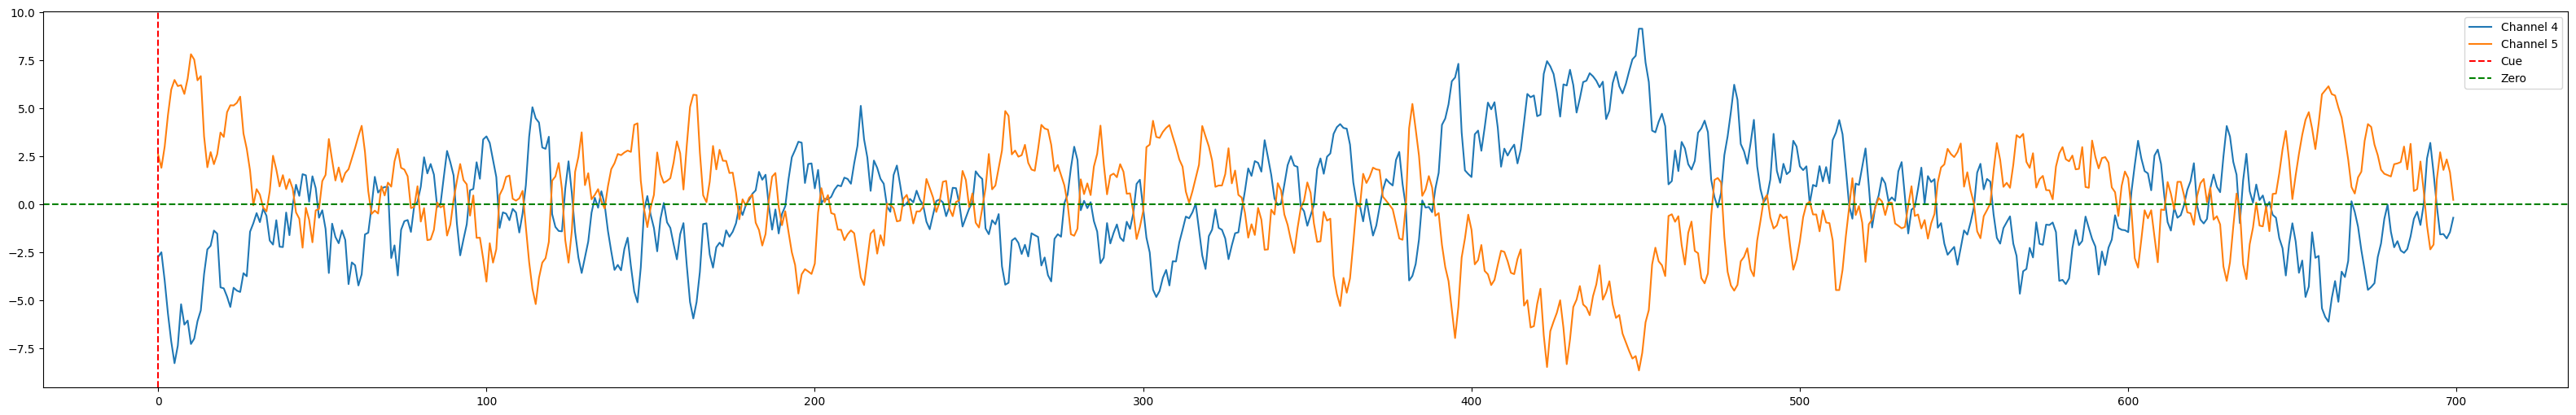

In [34]:
# Print single signal
mat_test = matA['o']['data'][0][0][89100:89800]
y_test = matA['o']['marker'][0][0]

weight = 40
high = 6

plt.figure(figsize=(weight, high))
plt.plot(mat_test.T[4], label='Channel 4')
plt.plot(mat_test.T[5], label='Channel 5')

cue_position = 0
plt.axvline(x=cue_position, color='red', linestyle='--', label='Cue')
plt.axhline(y=0, color='green', linestyle='--', label='Zero')

plt.legend()
plt.show()

### Create subjects

#### All Subjects

In [50]:
mat = np.concatenate((matJ1['o']['data'][0][0],
                      matJ2['o']['data'][0][0],
                      matJ3['o']['data'][0][0],
                      matA['o']['data'][0][0],
                      matB1['o']['data'][0][0],
                      matB2['o']['data'][0][0],
                      matB3['o']['data'][0][0],
                      matC1['o']['data'][0][0],
                      matC2['o']['data'][0][0],
                      matC3['o']['data'][0][0],
                      matD['o']['data'][0][0],
                      matE1['o']['data'][0][0],
                      matE2['o']['data'][0][0],
                      matE3['o']['data'][0][0],
                      matF1['o']['data'][0][0],
                      matF2['o']['data'][0][0],
                      matF3['o']['data'][0][0]), axis=0)

y = np.concatenate((matJ1['o']['marker'][0][0],
                      matJ2['o']['marker'][0][0],
                      matJ3['o']['marker'][0][0],
                      matA['o']['marker'][0][0],
                      matB1['o']['marker'][0][0],
                      matB2['o']['marker'][0][0],
                      matB3['o']['marker'][0][0],
                      matC1['o']['marker'][0][0],
                      matC2['o']['marker'][0][0],
                      matC3['o']['marker'][0][0],
                      matD['o']['marker'][0][0],
                      matE1['o']['marker'][0][0],
                      matE2['o']['marker'][0][0],
                      matE3['o']['marker'][0][0],
                      matF1['o']['marker'][0][0],
                      matF2['o']['marker'][0][0],
                      matF3['o']['marker'][0][0]), axis=0)

mat.shape

(11301544, 22)

#### Subject A

In [ ]:
mat = matA['o']['data'][0][0]
y = matA['o']['marker'][0][0]

#### Subject B

In [ ]:
mat = np.concatenate((matB1['o']['data'][0][0],
                      matB2['o']['data'][0][0],
                      matB3['o']['data'][0][0]), axis=0)

y = np.concatenate((matB1['o']['marker'][0][0],
                      matB2['o']['marker'][0][0],
                      matB3['o']['marker'][0][0]), axis=0)

#### Subject D

In [ ]:
mat = matD['o']['data'][0][0]
y = matD['o']['marker'][0][0]

#### Subject C

In [ ]:
mat = np.concatenate((matC1['o']['data'][0][0],
                      matC2['o']['data'][0][0],
                      matC3['o']['data'][0][0]), axis=0)

y = np.concatenate((matC1['o']['marker'][0][0],
                      matC2['o']['marker'][0][0],
                      matC3['o']['marker'][0][0]), axis=0)

#### Subject E

In [ ]:
mat = np.concatenate((matE1['o']['data'][0][0],
                      matE2['o']['data'][0][0],
                      matE3['o']['data'][0][0]), axis=0)

y = np.concatenate((matE1['o']['marker'][0][0],
                      matE2['o']['marker'][0][0],
                      matE3['o']['marker'][0][0]), axis=0)

#### Subject F

In [ ]:
mat = np.concatenate((matF1['o']['data'][0][0],
                      matF2['o']['data'][0][0],
                      matF3['o']['data'][0][0]), axis=0)

y = np.concatenate((matF1['o']['marker'][0][0],
                      matF2['o']['marker'][0][0],
                      matF3['o']['marker'][0][0]), axis=0)

#### Subject J

In [38]:
mat = np.concatenate((matJ1['o']['data'][0][0],
                      matJ2['o']['data'][0][0],
                      matJ3['o']['data'][0][0]), axis=0)

y = np.concatenate((matJ1['o']['marker'][0][0],
                      matJ2['o']['marker'][0][0],
                      matJ3['o']['marker'][0][0]), axis=0)

### Number of channels

In [51]:
nchannel = len(mat[1])

In [ ]:
# Best channels
cols = [4, 5, 14, 15, 19]
mat = mat[:, cols]
nchannel = len(mat[1])

### Filtering

Creating RawArray with float64 data, n_channels=22, n_times=11301544
    Range : 0 ... 11301543 =      0.000 ... 56507.715 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (1.655 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    6.5s


Effective window size : 10.240 (s)


<ipython-input-81-aa6ae0488564>:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False )


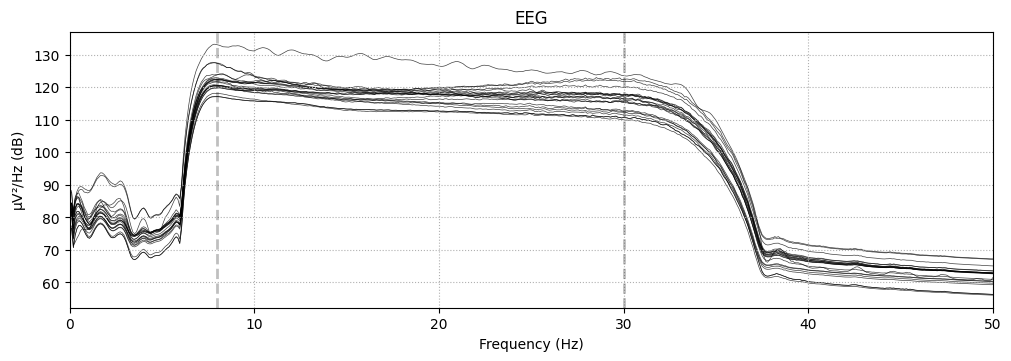

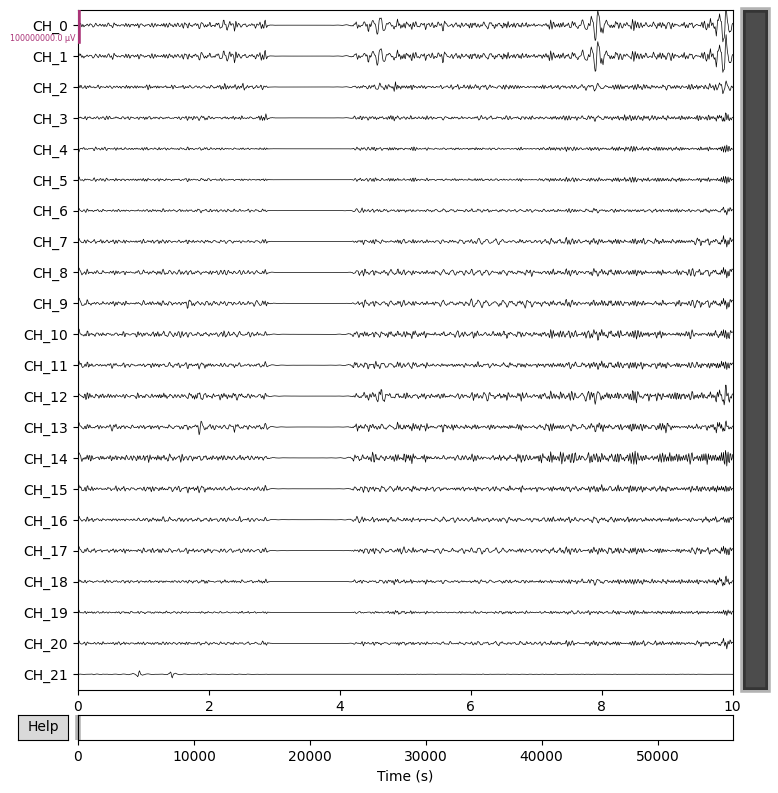

In [81]:
# Create a raw data
ch_types = ['eeg'] * nchannel
info = mne.create_info(ch_names=[f'CH_{i}' for i in range(nchannel)], sfreq=200, ch_types=ch_types)
raw = mne.io.RawArray(mat.T, info)

# Upper passband and Lower passband
raw.filter(l_freq=8, h_freq=30)
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False )
raw.plot(scalings=50, n_channels=nchannel, block=True)

mat = raw.get_data().T

### PCA


In [56]:
nchannel=12

pca = PCA(n_components=nchannel)
pca.fit(mat)

mat = pca.transform(mat)
mat.shape

(11301544, 12)

### ICA

In [82]:
nchannel=11

fast_ica = FastICA(n_components=nchannel)
mat = fast_ica.fit_transform(mat)
mat.shape

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


(11301544, 11)

### Signal lenght

In [52]:
df = pd.DataFrame(mat)
y = pd.DataFrame(y)
df['label'] = y

y.value_counts()

0     7770369
2     1110012
1     1090691
3      996203
91     288061
90      40015
99       5158
92       1035
dtype: int64

In [53]:
from collections import Counter

#Extract the index of each signal
index = []

for idx, num in enumerate(df['label']):
  if num in [1, 2, 3] and df['label'][idx-1] == 0:
    index.append((idx, num))

value_counts = Counter(tupla[1] for tupla in index)
for value, count in value_counts.items():
  print(f"Class: {value}, total: {count} ")

print(f'Events: {len(index)}')

Class: 3, total: 5030 
Class: 1, total: 5491 
Class: 2, total: 5605 
Events: 16126


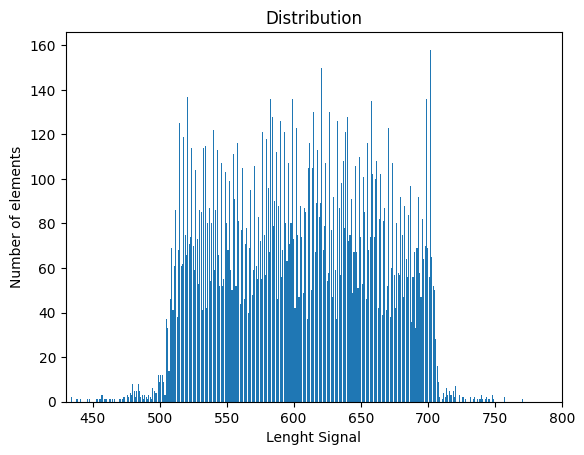

In [54]:
# Compute the lenghts distribution of trials
diff_counts = {}

for idx, el in enumerate(index):
  if idx == len(index)-1: break

  diff = index[idx+1][0] - el[0]

  # Check if the difference is already in the dictionary
  if diff in diff_counts: diff_counts[diff] += 1
  else: diff_counts[diff] = 1

sorted_keys = sorted(diff_counts.keys())

# Histogram
plt.bar(diff_counts.keys(), diff_counts.values())
plt.xlabel('Lenght Signal')
plt.xlim(430,800)
plt.ylabel('Number of elements')
plt.title('Distribution')
plt.show()

In [55]:
# 200 hz equal to 200 sample for 1 second
# 600 sample equal to 3 second
slenght = 600

In [56]:
# From dataset to matrix
data = []
df = df.drop(columns=['label'])

for el in index:
  matrix = df[el[0] : el[0]+slenght].values
  data.append(matrix)

# From matrix to numpy Array
eeg_data_arr = np.array(data)
eeg_data_arr.shape

(16126, 600, 22)

### Normalization

In [57]:
eeg_data_reshaped = eeg_data_arr.reshape(-1, nchannel)

# Standardization (z-score normalization) each channel
mean_per_channel = np.mean(eeg_data_reshaped, axis=0)
std_per_channel = np.std(eeg_data_reshaped, axis=0)
eeg_data_standardized = (eeg_data_reshaped - mean_per_channel) / std_per_channel

# Return to original size
eeg_data_standardized = eeg_data_standardized.reshape(eeg_data_arr.shape[0], slenght, nchannel)
eeg_data_arr = eeg_data_standardized
eeg_data_arr.shape

(16126, 600, 22)

### One hot

In [58]:
from keras.utils import to_categorical

eeg_label_arr = np.array([el[1] for el in index])
eeg_label_arr = to_categorical(eeg_label_arr)
print(f'Label: ({eeg_label_arr[0]})')

Label: ([0. 0. 0. 1.])


## Convolutional Neural Network

### Train and Test set

In [59]:
train_data, test_data, train_labels, test_labels = train_test_split(
    eeg_data_arr, eeg_label_arr, test_size=0.2, random_state=55
)

In [60]:
print("train data shape: " + format(train_data.shape))
print("test data shape: " + format(test_data.shape))
print("train labels shape: " + format(train_labels.shape))
print("test labels shape: "+ format(test_labels.shape))

train data shape: (12900, 600, 22)
test data shape: (3226, 600, 22)
train labels shape: (12900, 4)
test labels shape: (3226, 4)


In [61]:
print(train_data.shape)
train_data_transposed = np.transpose(train_data, (0, 2, 1))
print(train_data_transposed.shape)
train_data_reshaped = train_data.reshape(train_data_transposed.shape[0], nchannel, slenght, 1)
print(train_data_reshaped.shape)

print(test_data.shape)
test_data_transposed = np.transpose(test_data, (0, 2, 1))
print(test_data_transposed.shape)
test_data_reshaped = test_data.reshape(test_data_transposed.shape[0], nchannel, slenght, 1)
print(test_data_reshaped.shape)

(12900, 600, 22)
(12900, 22, 600)
(12900, 22, 600, 1)
(3226, 600, 22)
(3226, 22, 600)
(3226, 22, 600, 1)


### Model

#### Our RNN 1D

In [62]:
model = models.Sequential()

# Block 1
model.add(layers.Conv1D(64, 22, activation='relu', input_shape=(slenght, nchannel)))
model.add(layers.MaxPooling1D(3))
model.add(layers.BatchNormalization())

# Block 2
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.GRU(64, return_sequences=True))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(3))

# Block 3
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(22, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 579, 64)           31040     
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 193, 64)           0         
 ng1D)                                                           
                                                                 
 batch_normalization_20 (Ba  (None, 193, 64)           256       
 tchNormalization)                                               
                                                                 
 conv1d_11 (Conv1D)          (None, 191, 32)           6176      
                                                                 
 gru_5 (GRU)                 (None, 191, 64)           18816     
                                                                 
 batch_normalization_21 (Ba  (None, 191, 64)          

#### CNN 1D

In [42]:
model = models.Sequential()

# Block 1
model.add(layers.Conv1D(10, 10, activation='relu', input_shape=(slenght, nchannel)))
model.add(layers.MaxPooling1D(3))
model.add(layers.BatchNormalization())

# Block 2
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(3))

# Dropout
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(22, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 591, 10)           2210      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 197, 10)           0         
 g1D)                                                            
                                                                 
 batch_normalization_10 (Ba  (None, 197, 10)           40        
 tchNormalization)                                               
                                                                 
 conv1d_9 (Conv1D)           (None, 193, 64)           3264      
                                                                 
 batch_normalization_11 (Ba  (None, 193, 64)           256       
 tchNormalization)                                               
                                                      

#### Our RNN 2D

In [43]:
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(32, (1, 80), activation='relu', input_shape=(nchannel, slenght, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

# Block 2
model.add(layers.Reshape((-1, 64)))  # Reshape per adattarsi all'input del GRU
model.add(layers.GRU(128, return_sequences=True))
model.add(layers.MaxPooling1D(6))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dropout(0.25))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 22, 521, 32)       2592      
                                                                 
 batch_normalization_12 (Ba  (None, 22, 521, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 260, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_13 (Ba  (None, 11, 260, 32)       128       
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 11, 260, 32)       0         
                                                      

#### EEGNet

In [45]:
from tensorflow.keras.constraints import max_norm

input_shape = (nchannel, slenght)
F1 = 32
D = 2
F2 = 16
N = 4
p = 0.25

model = models.Sequential()

# Block 1
model.add(layers.Conv2D(F1, (1,64), padding='same', activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.DepthwiseConv2D((5, 1), depth_multiplier=D, padding='valid', depthwise_initializer='ones', use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.AveragePooling2D((1, 4)))
model.add(layers.Dropout(p))

# Block 2
model.add(layers.SeparableConv2D(F2, (1, 16), padding='same', activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.AveragePooling2D((1, 8)))
model.add(layers.Dropout(p))

model.add(layers.Flatten())

# Classifier
model.add(layers.Dense(N * (F2 * (input_shape[1] // 30)), activation='linear', kernel_constraint=max_norm(0.25)))
model.add(layers.Dense(N, activation='softmax'))

model.build(input_shape=(None, nchannel, slenght, 1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 22, 600, 32)       2080      
                                                                 
 batch_normalization_17 (Ba  (None, 22, 600, 32)       128       
 tchNormalization)                                               
                                                                 
 depthwise_conv2d_1 (Depthw  (None, 18, 600, 64)       320       
 iseConv2D)                                                      
                                                                 
 batch_normalization_18 (Ba  (None, 18, 600, 64)       256       
 tchNormalization)                                               
                                                                 
 activation_2 (Activation)   (None, 18, 600, 64)       0         
                                                      

### Training CNN

In [64]:
%time
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train_data_reshaped, test_data_reshaped for 2D
# train_data, test_data for 1D
print(model.summary())

history = model.fit(train_data, train_labels, epochs=20,
                    validation_data=(test_data, test_labels))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 579, 64)           31040     
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 193, 64)           0         
 ng1D)                                                           
                                                                 
 batch_normalization_20 (Ba  (None, 193, 64)           256       
 tchNormalization)                                               
                                                                 
 conv1d_11 (Conv1D)          (None, 191, 32)           6176      
                                                                 
 gru_5 (GRU)                 (None, 191, 64)           18816     
                                                        

In [65]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

101/101 - 1s - loss: 0.4320 - accuracy: 0.8249 - 653ms/epoch - 6ms/step

Test accuracy: 0.8248605132102966


### Metrics

#### Accurancy

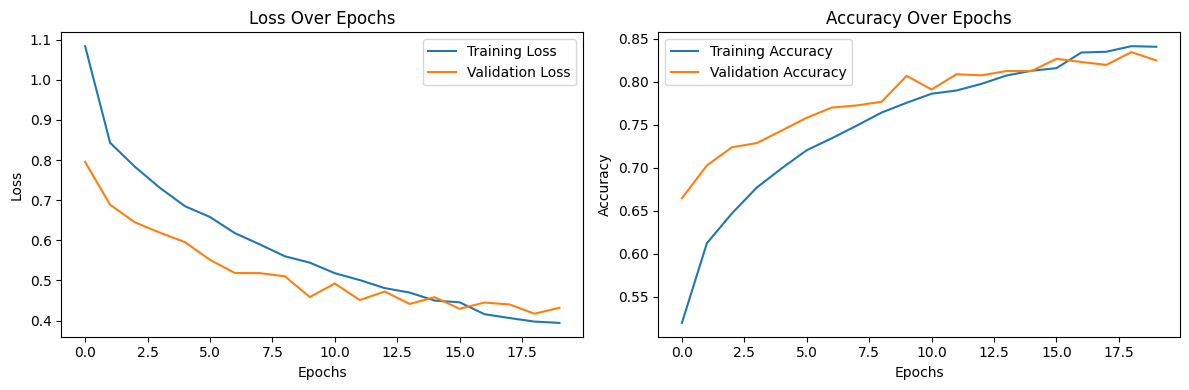

In [66]:
# Plotting loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### Confusion Matrix

101/101 [==============================] - 1s 6ms/step


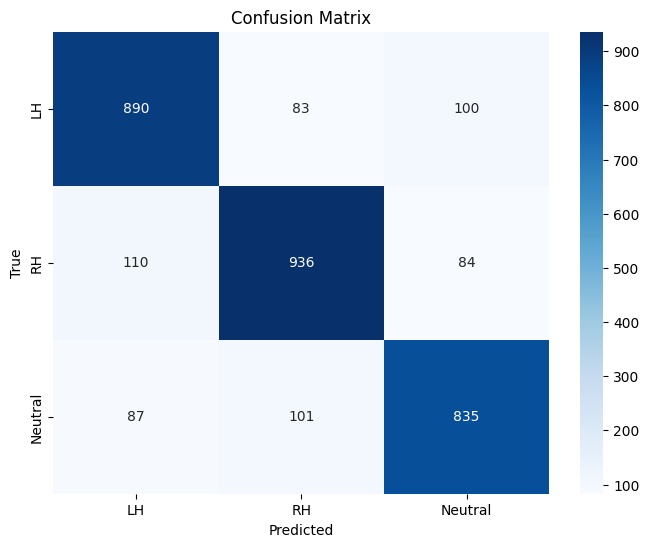

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
predictions = model.predict(test_data)

# Convert one-hot encoded labels back to categorical labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['LH', 'RH', 'Neutral'], yticklabels=['LH', 'RH', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### AUC ROC One vs All

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


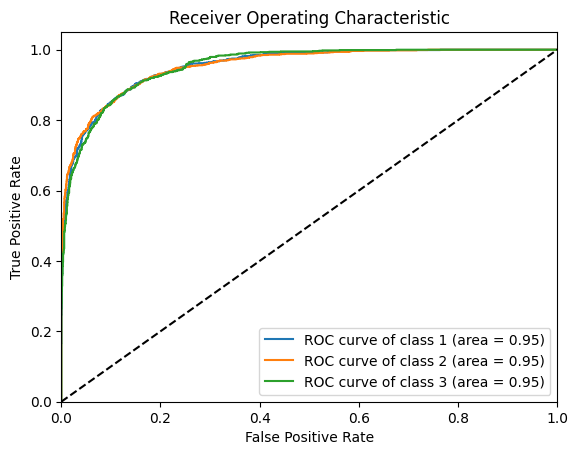

In [69]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

test_labels_bin = label_binarize(true_labels, classes=[0, 1, 2, 3])

# Compute ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):  # Supponendo che ci siano 3 classi
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure()
for i in range(4):
  if i != 0:
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



#### F1 Score

In [70]:
from sklearn.metrics import f1_score

# F1 score
f1 = f1_score(true_labels, predicted_labels, average='macro')

print('F1 Score: ', f1)

F1 Score:  0.8246332450635422
